# NN 다중 분류 (흑백)
- MNIST data set

In [ ]:
!pip install --q ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 7.44 s (started: 2024-07-01 00:54:43 +00:00)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

time: 548 µs (started: 2024-07-01 00:54:51 +00:00)


## 1. 데이터 준비

In [ ]:
# !wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

time: 359 µs (started: 2024-07-01 00:54:51 +00:00)


In [ ]:
mnist = np.load('mnist.npz')

time: 1.51 ms (started: 2024-07-01 00:54:51 +00:00)


In [ ]:
from re import X # 그냥 이미 주어진 데이터를 train과 test로 변환하여 저장함.
X_train = mnist['x_train']
y_train = mnist['y_train']
X_test = mnist['x_test']
y_test = mnist['y_test']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
time: 317 ms (started: 2024-07-01 00:54:51 +00:00)


## 2. 데이터 확인

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

time: 5.27 ms (started: 2024-07-01 00:54:51 +00:00)


In [ ]:
np.random.seed(42)
sample = np.random.randint(60000, size= 25)
sample

# 데이터 크기가 총 60000개라서 랜덤으로 25개만 뽑아냄

array([56422, 15795,   860, 38158, 54343, 44732, 11284, 54886,  6265,
       16850, 37194, 21962, 47191, 44131, 16023, 41090,  1685,   769,
       59735, 56101,  2433,  5311, 37819, 39188, 17568])

time: 9.39 ms (started: 2024-07-01 00:54:51 +00:00)


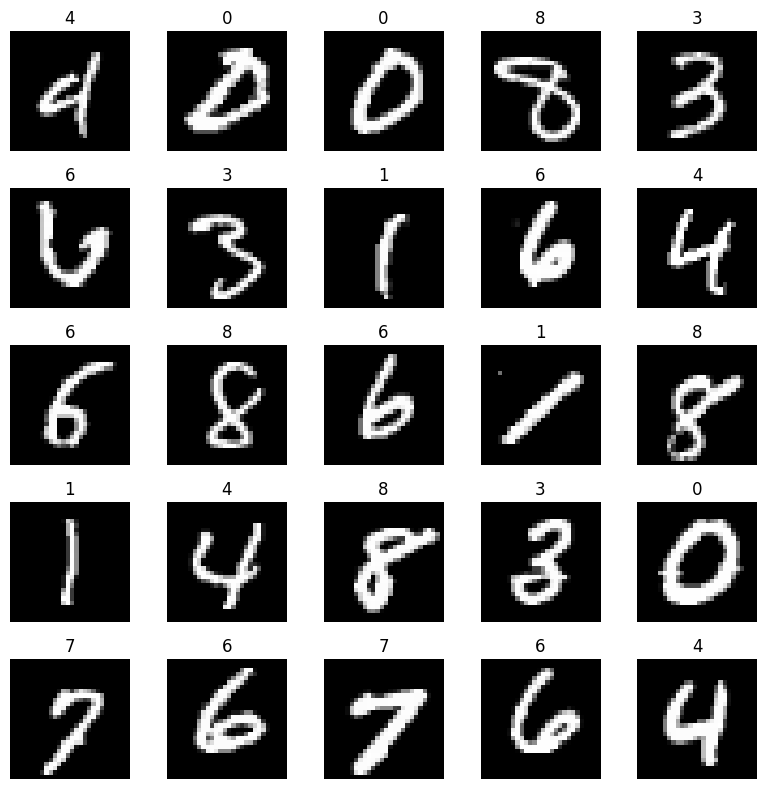

time: 4.55 s (started: 2024-07-01 00:54:51 +00:00)


In [ ]:
fig = plt.figure(figsize=(8,8))
for i, idx in enumerate(sample):
  plt.subplot(5, 5, i+1) # subplot은 인덱스가 1부터 시작이라 +1해서 시작하는 거임.
  plt.imshow(X_train[idx], cmap='gray') # X_train에서 이미지를 랜덤으로 뽑아내서 그리는데, 흑백이므로 gray로 그림
  plt.axis('off')
  plt.title(y_train[idx])
fig.tight_layout()
plt.show()

# 그려보는 방식.

In [ ]:
sr = pd.Series(y_train).value_counts().sort_index()

time: 12.1 ms (started: 2024-07-01 00:54:56 +00:00)


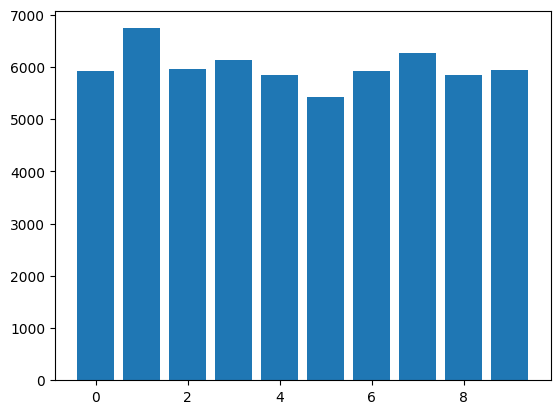

time: 1.12 s (started: 2024-07-01 00:54:56 +00:00)


In [ ]:
plt.bar(sr.index, sr.values)
plt.show()

## 학습용, 검증용 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split # 이제서야 배우는 데이터 쉽게 분리하는 방법

time: 891 µs (started: 2024-07-01 00:54:57 +00:00)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state= 42)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)
time: 131 ms (started: 2024-07-01 00:54:57 +00:00)


## 4. 전처리
- x값은 스케일링
- y값은 원핫 인코딩

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  17,  47,  47,  47,  47,  47,  47,
         28,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,  63,   0,   0,
          0,  62, 138, 197, 197, 197, 217, 253, 253, 253, 253, 253, 253,
        230,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 151, 170,   0,  56,
        232, 250, 253, 231, 217, 217, 217, 217, 217, 217, 217, 128, 179,
        132,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 104, 251, 170,  20, 233,
        253, 199,  84,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   5, 203, 253, 160,   3,  20,
         20,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  77, 253, 228,  21,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 150, 253, 249, 223, 223, 193,
         71,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 126, 253, 253, 253, 253, 253,
        253, 196, 121,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   8, 202, 191, 144, 144, 217,
        251, 253, 253, 170,   4,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         53, 236, 253, 253, 215,   3,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  34, 180, 253, 253, 128,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   2, 140, 253, 236,  36,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  37,   0,   0,   0,   0,   0,
          0,   0,   0,  13, 215, 253,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 246,  53,   0,   0,   0,   0,
          0,   0,   0,   0, 105, 253,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 254,  57,   0,   0,   0,   0,
          0,   0,   0,   0,  99, 253,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255,  65,   0,   0,   0,   0,
          0,   0,   0,  35, 217, 253,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 227, 223, 115,  18,   0,   0,
          5,  68, 113, 222, 253, 242,  46,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  41, 224, 253, 227, 218, 218,
        220, 253, 253, 253, 249,  76,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 150, 215, 253, 253,
        253, 253, 205, 175,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

time: 38.9 ms (started: 2024-07-01 00:54:57 +00:00)


In [ ]:
# minmaxscaling: X - Xmin / Xmax - Xmin -> 이건데 Xmin은 0이고 Xmax는 255라서 그냥 255로 나누면 됨.
X_train_s = X_train / 255.
X_val_s = X_val / 255.

time: 163 ms (started: 2024-07-01 00:55:35 +00:00)


In [ ]:
# y의 one-hot encoding
from keras.utils import to_categorical # 숫자로 분류하는 다중 분류 이므로 원-핫 인코딩 진행

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

time: 2.69 ms (started: 2024-07-01 00:55:38 +00:00)


In [ ]:
print(y_train_o.shape, y_val_o.shape)

(48000, 10) (12000, 10)
time: 609 µs (started: 2024-07-01 00:56:10 +00:00)


In [ ]:
print(X_train_s.shape, X_val_s.shape, y_train_o.shape, y_val_o.shape)

(48000, 28, 28) (12000, 28, 28) (48000, 10) (12000, 10)
time: 925 µs (started: 2024-07-01 00:57:49 +00:00)


## 5. 모델

In [ ]:
X_train_s = X_train_s.reshape(-1, 28 * 28) # 이미지라서 몇개의 행으로 나눠지는지는 상관 없고 이미지의 크기인 28 * 28만 중요함. -1 넣으면 알아서 맞춰짐.
X_val_s = X_val_s.reshape(-1, 28 * 28)

X_train_s.shape, X_val_s.shape

((48000, 784), (12000, 784))

time: 11 ms (started: 2024-07-01 01:03:09 +00:00)


In [ ]:
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(64, activation='relu', input_shape=(784,)), # 이렇게 계산해서 넣어줘도 되고~ 아님 이미 바꿔줬으니까 그냥 인덱스 크기 가져와도 될듯
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(10, activation='softmax') # 다중 분류 이므로 softmax
    ]
)

time: 369 ms (started: 2024-07-01 01:06:17 +00:00)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 79 ms (started: 2024-07-01 01:06:23 +00:00)


In [ ]:
adam = keras.optimizers.Adam(learning_rate= 0.01) # 'adam'을 이용해도 되고, lr을 조정해주고 싶으면 이렇게 따로 선언해줘도 좋다

model.compile(
    loss= 'categorical_crossentropy',
    optimizer= adam,
    metrics= ['accuracy']
)

time: 30 ms (started: 2024-07-01 01:25:44 +00:00)


In [ ]:
epochs = 30
batch_size = 32

history = model.fit(
    X_train_s, y_train_o,
    epochs= epochs,
    batch_size= batch_size,
    validation_data= (X_val_s, y_val_o)
)

Epoch 1/30
1500/1500 [==============================] - 9s 4ms/step - loss: 0.3262 - accuracy: 0.9058 - val_loss: 0.1930 - val_accuracy: 0.9433
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2006 - accuracy: 0.9446 - val_loss: 0.2263 - val_accuracy: 0.9427
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1746 - accuracy: 0.9528 - val_loss: 0.1995 - val_accuracy: 0.9464
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1568 - accuracy: 0.9579 - val_loss: 0.1919 - val_accuracy: 0.9509
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1500 - accuracy: 0.9615 - val_loss: 0.1843 - val_accuracy: 0.9583
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1385 - accuracy: 0.9637 - val_loss: 0.1771 - val_accuracy: 0.9582
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1313 - accuracy: 0.9666 - val_loss: 0.1601 - val_accuracy:

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

time: 2.05 ms (started: 2024-07-01 01:31:00 +00:00)


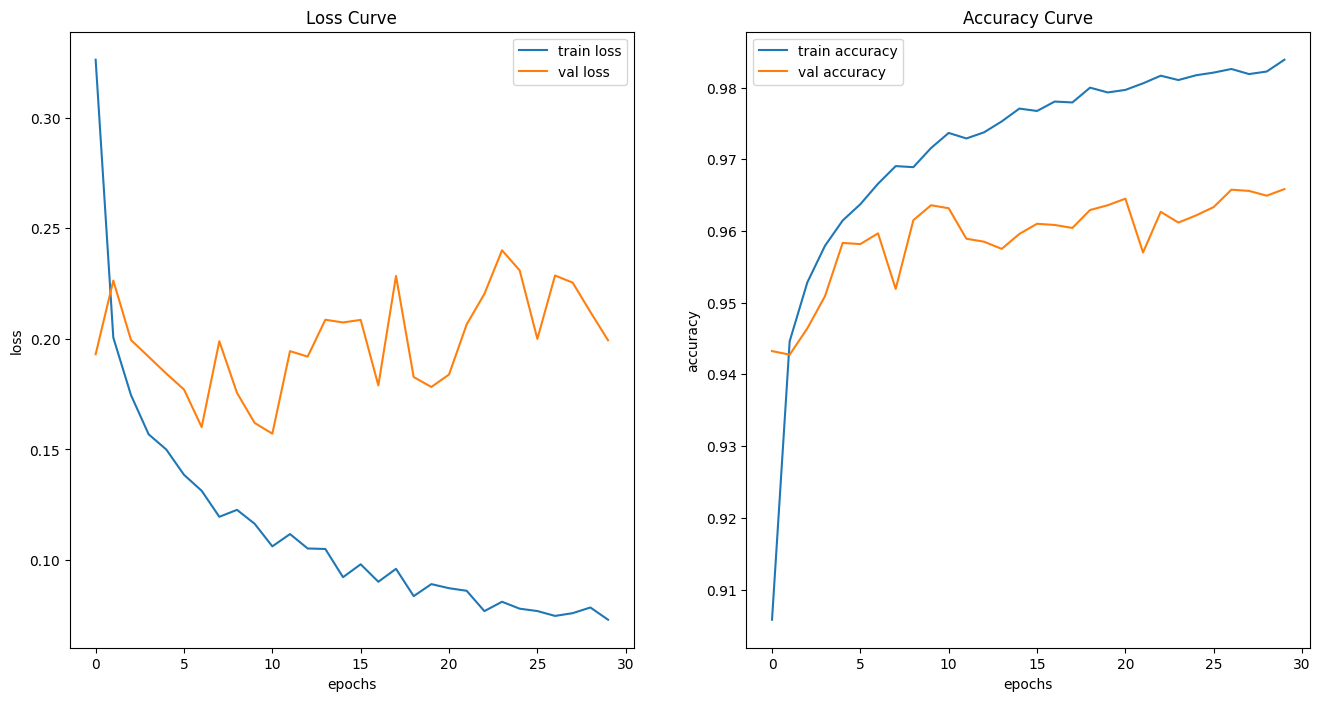

time: 608 ms (started: 2024-07-01 01:31:01 +00:00)


In [ ]:
plot_history(history)

## 6. 평가

In [ ]:
X_test.shape

(10000, 28, 28)

time: 4.86 ms (started: 2024-07-01 01:33:09 +00:00)


In [ ]:
X_test_s = X_test / 255. # 테스트를 위한 데이터는 아직 전처리가 끝나지 않음. scaling 후에
X_test_s = X_test.reshape(-1, 28 * 28) # shape 변경 후에
y_test_o = to_categorical(y_test) # y는 one-hot encoding 진행한다

time: 131 ms (started: 2024-07-01 03:23:27 +00:00)


In [ ]:
X_test_s.shape, y_test_o.shape

((10000, 28, 28, 1), (10000, 10))

time: 11.3 ms (started: 2024-07-01 03:23:33 +00:00)


In [ ]:
y_pred = model.predict(X_test_s)

y_pred[:10]

313/313 [==============================] - 1s 3ms/step


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.99999994, 0.        , 0.        ],
       [0.        , 0.        , 0.99999994, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.99999994, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.99999994,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.99999994, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.99999994,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

time: 3.13 s (started: 2024-07-01 01:35:00 +00:00)


In [ ]:
y_pred = np.argmax(y_pred, axis= 1)
y_pred[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 4, 9])

time: 9.73 ms (started: 2024-07-01 01:36:03 +00:00)


accuracy: 0.9669
recall: 0.9663141664130845
precision: 0.9672791381476673
f1: 0.9665851944046464


<Axes: >

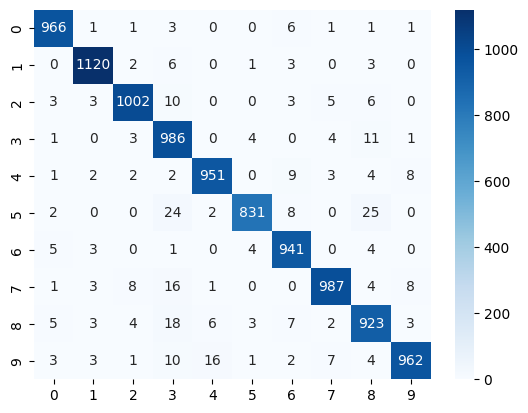

time: 2.29 s (started: 2024-07-01 01:37:35 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred, average="macro")}')
print(f'precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'f1: {f1_score(y_test, y_pred, average="macro")}')

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')

In [ ]:
sample = np.random.randint(10000, size= 25)

time: 618 µs (started: 2024-07-01 01:41:42 +00:00)


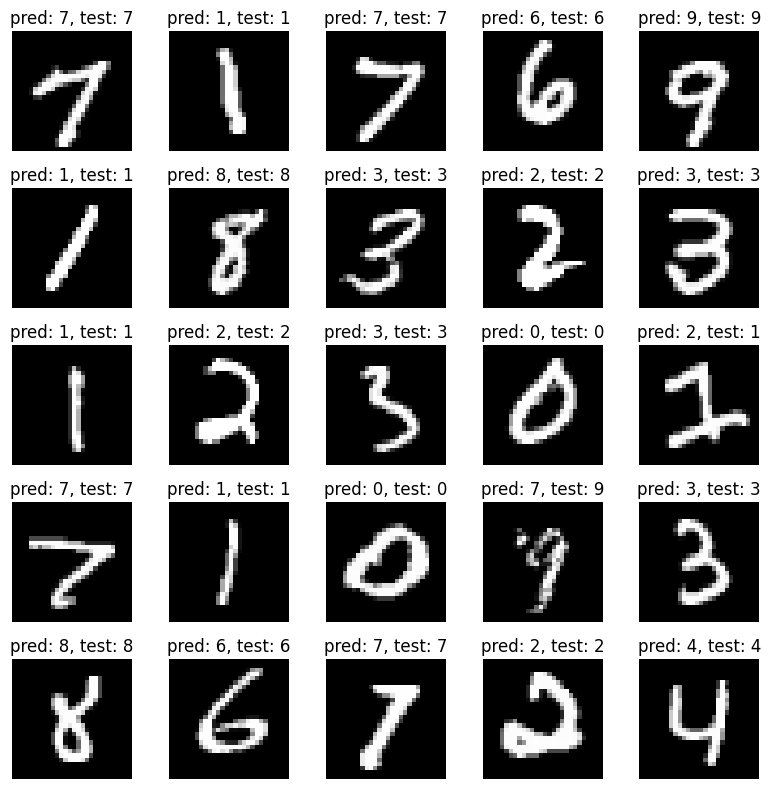

time: 1.65 s (started: 2024-07-01 01:41:44 +00:00)


In [ ]:
fig = plt.figure(figsize=(8,8))
for i, idx in enumerate(sample):
  plt.subplot(5, 5, i+1)
  plt.imshow(X_test[idx], cmap='gray')
  plt.axis('off')
  plt.title(f'pred: {y_pred[idx]}, test: {y_test[idx]}')
fig.tight_layout()
plt.show()